<a href="https://colab.research.google.com/github/ArcherM123/BCS-109-Assignment-Storage/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I will first start my EDA by bringing the database I will be using into Colab.
As you can see in the database below the information we will be working with is the 11 features you see below Name, Variation, Type1, Type2, TotalStats, HP,Attack,	Defense, Sp.Atk, Sp.Def, Speed. we will be using to determine which group or type of Pokemon is the has the overall best stats and which group has the weakest stats.


In [197]:
#Load panda and numpy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
#Bringing in my data
df = pd.read_csv("https://raw.githubusercontent.com/ArcherM123/BCS-109-Assignment-Storage/main/PokemonDb.csv")

#Creating a second copy of data
df_original = df

#check dimensions of the data
print('dimensions of the data are', df.shape)

#Show the beginning of the data
df.head()


dimensions of the data are (1071, 11)


Name Variation  Type1   Type2  Total  HP  Attack  Defense  Sp.Atk  \
0   Bulbasaur       NaN  Grass  Poison    318  45      49       49      65   
1     Ivysaur       NaN  Grass  Poison    405  60      62       63      80   
2    Venusaur       NaN  Grass  Poison    525  80      82       83     100   
3    Venusaur     Mega   Grass  Poison    625  80     100      123     122   
4  Charmander       NaN   Fire     NaN    309  39      52       43      60   

   Sp.Def  Speed  
0      65     45  
1      80     60  
2     100     80  
3     120     80  
4      50     65

First I check to see if there is any empty data in the dataset. So I can know to remove it later.

In [ ]:
#checking to see if I have any empty data
df.isna().sum()

Name           0
Variation    874
Type1          0
Type2        492
Total          0
HP             0
Attack         0
Defense        0
Sp.Atk         0
Sp.Def         0
Speed          0
dtype: int64

Then I check to see if there is any unique values in each colemn so I know whether I have to take note of this later.

In [ ]:
#Check how many unique values are in each column
df.nunique

<bound method DataFrame.nunique of              Name       Variation   Type1   Type2  Total   HP  Attack  \
0       Bulbasaur             NaN   Grass  Poison    318   45      49   
1         Ivysaur             NaN   Grass  Poison    405   60      62   
2        Venusaur             NaN   Grass  Poison    525   80      82   
3        Venusaur           Mega    Grass  Poison    625   80     100   
4      Charmander             NaN    Fire     NaN    309   39      52   
...           ...             ...     ...     ...    ...  ...     ...   
1066     Basculin  White-Striped    Water     NaN    460   70      92   
1067  Basculegion           Male    Water   Ghost    530  120     112   
1068  Basculegion         Female    Water   Ghost    530  120      92   
1069      Kleavor             NaN     Bug    Rock    505   70     135   
1070     Ursaluna             NaN  Normal  Ground    550  130     140   

      Defense  Sp.Atk  Sp.Def  Speed  
0          49      65      65     45  
1         

I then remove the empty data from each particular colemn so it wont interfere with any later results of the EDA. Also luckily all of the empty data are NaNs which makes them easy to convert another datatype and then remove them if there is a need to.

In [ ]:
#Removing empty data from the these columns
df[['Variation', 'Type2']] = df[['Variation','Type2']].fillna("")
df

Name       Variation   Type1   Type2  Total   HP  Attack  \
0       Bulbasaur                   Grass  Poison    318   45      49   
1         Ivysaur                   Grass  Poison    405   60      62   
2        Venusaur                   Grass  Poison    525   80      82   
3        Venusaur           Mega    Grass  Poison    625   80     100   
4      Charmander                    Fire            309   39      52   
...           ...             ...     ...     ...    ...  ...     ...   
1066     Basculin  White-Striped    Water            460   70      92   
1067  Basculegion           Male    Water   Ghost    530  120     112   
1068  Basculegion         Female    Water   Ghost    530  120      92   
1069      Kleavor                     Bug    Rock    505   70     135   
1070     Ursaluna                  Normal  Ground    550  130     140   

      Defense  Sp.Atk  Sp.Def  Speed  
0          49      65      65     45  
1          63      80      80     60  
2          83     100     100     80  
3         123     122     120     80  
4          43      60      50     65  
...       ...     ...     ...    ...  
1066       65      80      55     98  
1067       65      80      75     78  
1068       65     100      75     78  
1069       95      45      75     85  
1070      105      45      80     50  

[1071 rows x 11 columns]

Here I gather the Statistics for all of the quantitative data in the dataset. These being the 6 main stats and the total of all the stats as a whole.

In [ ]:
#Use the .describe method to get summary stats as wells as see the count of nonnull data
df.describe()

Total           HP       Attack      Defense       Sp.Atk  \
count  1071.000000  1071.000000  1071.000000  1071.000000  1071.000000   
mean    441.261438    70.366947    80.945845    74.864613    73.422969   
std     121.610604    26.646330    32.385281    31.170939    32.840700   
min     175.000000     1.000000     5.000000     5.000000    10.000000   
25%     330.000000    50.000000    56.500000    52.000000    50.000000   
50%     460.000000    68.000000    80.000000    70.000000    65.000000   
75%     517.500000    84.000000   100.000000    90.000000    95.000000   
max    1125.000000   255.000000   190.000000   250.000000   194.000000   

            Sp.Def        Speed  
count  1071.000000  1071.000000  
mean     72.481793    69.179272  
std      28.012037    30.229644  
min      20.000000     5.000000  
25%      50.000000    45.000000  
50%      70.000000    65.000000  
75%      90.000000    90.000000  
max     250.000000   200.000000

Now I'll generate a detailed report of the entire dataset this will be very useful as it will allow us to get detailed information on all the variables in the dataset, which help further our EDA.

In [ ]:
#Obtaining the Profile Report for more detailed information 
import pandas_profiling
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

From here we will make a list all the values that are in the Type1 catergory. This will be useful as the purpose of this EDA is to find which type of pokemon have the strongest stats, so know which Type1 has the most pokemon it could give a strong indication of which Typing of pokemon has the highest overall stats.

In [ ]:
#displaying individual parts of the catergorical data for a better understanding of the data
print(df['Type1'].value_counts())

Water       139
Normal      119
Grass        93
Bug          82
Psychic      80
Fire         68
Electric     62
Rock         59
Dark         48
Poison       43
Dragon       43
Ghost        42
Fighting     42
Ground       41
Ice          40
Steel        37
Fairy        24
Flying        8
Eletric       1
Name: Type1, dtype: int64


Here we create a chart to make the previous data easier to interpet.

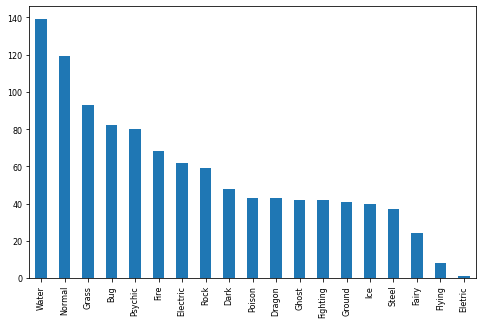

In [ ]:
#Providing a visiual representation of the catergorical data
plt.figure(figsize=(8,5))
df['Type1'].value_counts().plot(kind= 'bar', fontsize = 8)

Here we see the values of the secondary typings of all the pokemon that are in the dataset. Because certain Pokemon have a secondary typing along with their main one an exmaple being Charizard who would fit into both Fire and Flying groups knowing how many have a sencond typing and knowing which secondary typing belongs to most pokemon, These values could be useful.

In [ ]:
#Continuing the process of the displaying more catergorical data for a better understanding
print(df['Type2'].value_counts())

            492
Flying      115
Psychic      43
Fairy        41
Poison       40
Ground       40
Steel        37
Fighting     36
Dragon       34
Ghost        31
Grass        30
Dark         27
Water        20
Rock         19
Ice          18
Fire         17
Electric     11
Normal       11
Bug           9
Name: Type2, dtype: int64


Here is just a visual aid to make the previous data easier to interpret.

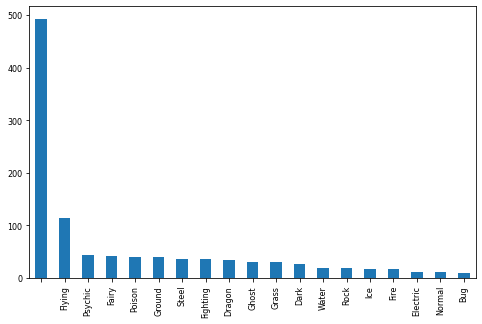

In [ ]:
#Providing a visiual representation of more catergorical data
plt.figure(figsize=(8,5))
df['Type2'].value_counts().plot(kind= 'bar', fontsize = 8)

Now we will remove the catergorical data so will be able to graph the numerical data in this set

In [ ]:
#removing the catergorcial data
numerical_columns = column_names.remove('Type1')

From the histogram we made from the all the numerical data which happens to be all the stat values we can gather a general trend that most of the stats average out around a 100 being the mean value and the mean of the total stat value being around 500, with there being a small amount of outliers who happen to be well above the average we can determine that whichever typing that most of those outliers belong to will be the deteriming factor.

<function matplotlib.pyplot.show>

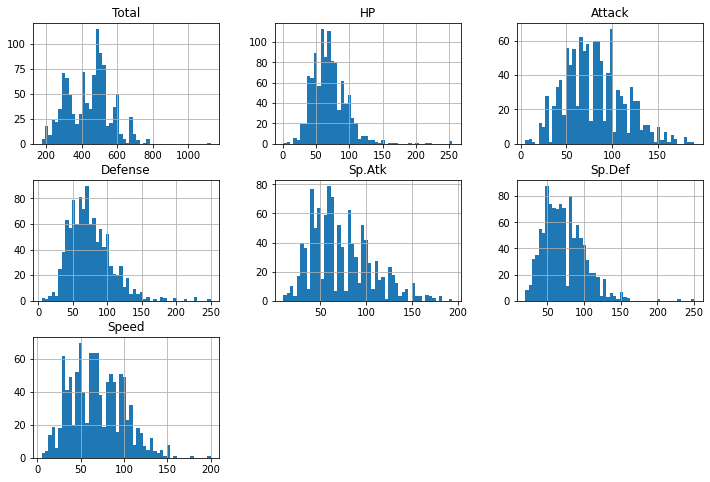

In [ ]:
#Plotting histograms for a visual representation of the numerical data
df_numerical = df.drop(['Type1'],axis= 1)

df_numerical = df.hist(bins =50, figsize= (12,8))
plt.show

Now we will plot the Correlation Matrix which will show which stats happen to have a high rate of corrleation with eachother. For the most part all of the stat values dont happen to have a particularly low correlation rate.

<function matplotlib.pyplot.show>

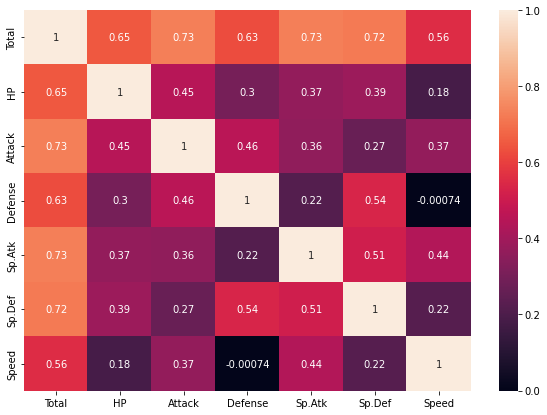

In [ ]:
#Plotting a Correlation Matrix to see if there is any 
corrMatrix = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corrMatrix, annot= True)
plt.show

We will now plot a scattergram that will show any further corrleation between any of the stat values. Though similarly to the Correlation Matrix not much can be gathered from the scattergrams.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa904005290>,
      dtype=object)

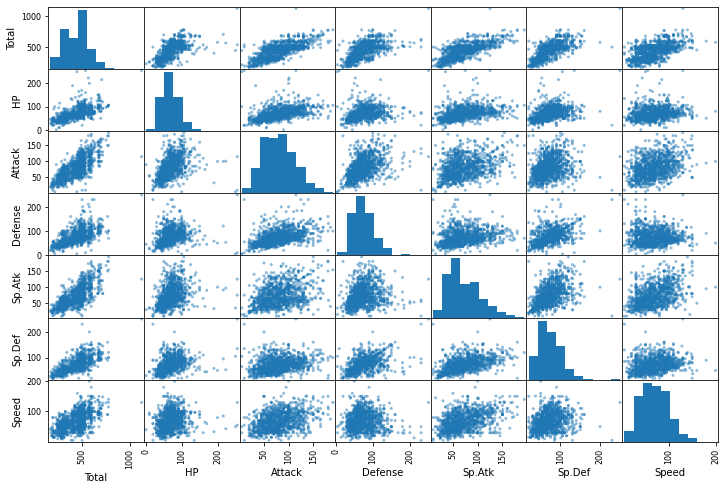

In [ ]:
#Comparing Attributes to get a better understanding of the numerical data
from pandas.plotting import scatter_matrix

attributes = ['Total','HP','Attack','Defense','Sp.Atk','Sp.Def','Speed']
scatter_matrix(df[attributes], figsize= (12,8))

Here are the Linear Regression Models. These would likely not provide much insight into the task at hand since the Linear Regression Model is mostly used to find relationship between the explantory and response variables. Since the data we are working with are all static values with no explantory and response variables the Linear Regression Model most likely wont provide any meaningful data.

In [ ]:
from sklearn.linear_model import LinearRegression

y = df['Total'].copy()
X = df.drop(['Total'], axis = 1)

lin_reg = LinearRegression().fit(X,y)
r_sq= lin_reg.score(X, y)

print(r_sq)

In [ ]:
import statsmodels.api as sm

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

In light of not having a success with the previous models and figures that were used before. I felt it was neccessary to provide a figure that would likely provide the necessary data. So I created a simple bar graph that would display the overall total stats per Type. With this we can now see that the type of Pokemon with the most powerful stats is the Poison Type while Electric is shown to be the weakest. This most be due to the poison typing containing a high amount of the outlier Pokemon that were seen in the histograms.

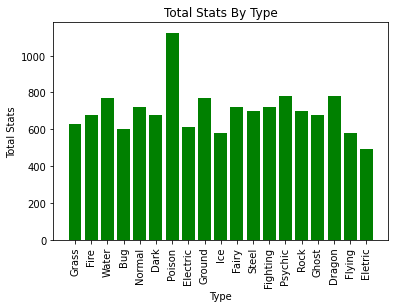

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/ArcherM123/BCS-109-Assignment-Storage/main/PokemonDb.csv")
  
df_bar = pd.DataFrame(data)
  
X = list(df['Type1'])
Y = list(df['Total'])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Total Stats By Type")
plt.xlabel("Type")
plt.ylabel("Total Stats")
plt.xticks(rotation='vertical')  
# Show the plot
plt.show()